In [1]:
import os
os.chdir("G:/mmdetection-master/mmdetection-master/mmdet/datasets/data/sennet/train/")
os.listdir()

['kidney_1_dense',
 'kidney_1_dense_yolo',
 'kidney_1_voi',
 'kidney_2',
 'kidney_3_dense',
 'kidney_3_sparse',
 'kidney_merged']

(1706, 1510, 3) (1706, 1510, 3)
2576060 2576060


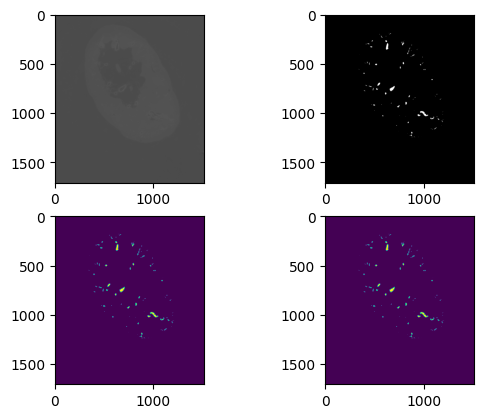

In [2]:
import cv2
import numpy as np
img = cv2.imread("kidney_merged/images/0590_3.tif")
mask = cv2.imread("kidney_merged/labels/0590_3.tif")
print(img.shape, mask.shape)
import matplotlib.pyplot as plt
plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.imshow(mask)
plt.subplot(2,2,3)
plt.imshow(mask[:,:,0])
plt.subplot(2,2,4)
plt.imshow(mask[:,:,1])
print(np.sum(mask[:,:,0]==mask[:,:,1]), mask.shape[0]*mask.shape[1])

In [4]:

def rle_encode(mask):
    pixel = mask.flatten()
    pixel = np.concatenate([[0], pixel, [0]])
    run = np.where(pixel[1:] != pixel[:-1])[0] + 1
    run[1::2] -= run[::2]
    rle = ' '.join(str(r) for r in run)
    if rle == '':
        rle = '1 0'
    return rle
rle_encode(np.array([]))

'1 0'

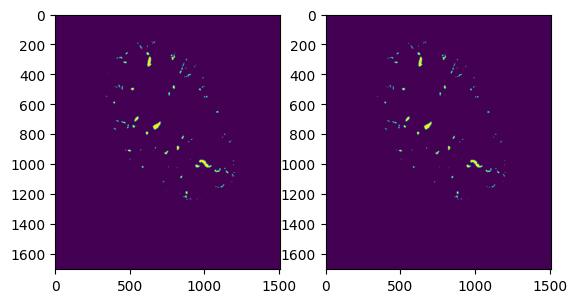

In [8]:

from skimage import measure
# mask = mask[:,:,0]
recovered = np.zeros(mask.shape)
polygons = measure.find_contours(mask.T)
for kk in range(len(polygons)):
    cv2.fillPoly(recovered, pts=np.int32(np.array(polygons[kk]).reshape(1, -1, 2)),color=(1,1,1))
plt.subplot(121);plt.imshow(recovered)
plt.subplot(122);plt.imshow(mask[:,:])

In [5]:
polygons

[array([[151.5, 677. ],
        [151.5, 676. ],
        [151.5, 675. ],
        [151. , 674.5],
        [150.5, 674. ],
        [150. , 673.5],
        [149.5, 674. ],
        [149. , 674.5],
        [148. , 674.5],
        [147.5, 675. ],
        [147. , 675.5],
        [146.5, 676. ],
        [147. , 676.5],
        [147.5, 677. ],
        [148. , 677.5],
        [149. , 677.5],
        [150. , 677.5],
        [151. , 677.5],
        [151.5, 677. ]]),
 array([[161.5, 710. ],
        [161. , 709.5],
        [160.5, 710. ],
        [161. , 710.5],
        [161.5, 710. ]]),
 array([[ 163.5, 1076. ],
        [ 163.5, 1075. ],
        [ 163. , 1074.5],
        [ 162.5, 1075. ],
        [ 162.5, 1076. ],
        [ 163. , 1076.5],
        [ 163.5, 1076. ]]),
 array([[165.5, 765. ],
        [165.5, 764. ],
        [165. , 763.5],
        [164.5, 763. ],
        [164. , 762.5],
        [163.5, 763. ],
        [163.5, 764. ],
        [164. , 764.5],
        [164.5, 765. ],
        [165. , 765.

In [17]:
# split up down
folder = "kidney_1_dense_yolo"
image_names = glob(f"./{folder}/images_backup/*.tif")
import shutil
import tifffile as tiff

for i in range(len(image_names)):
    image_name = image_names[i]
    mask_name = image_name.replace("images","labels")
    image = cv2.imread(image_name)
    mask = cv2.imread(mask_name)
    image_up = image[-912:]
    mask_up = mask[-912:]
    image_new = image_name.replace("_backup","").replace(".tif","_down.tif")
    mask_new = mask_name.replace("_backup","").replace(".tif","_down.tif")
    tiff.imsave(image_new, image_up)
    tiff.imsave(mask_new, mask_up)

C:\Users\Menghao\AppData\Local\Temp\ipykernel_41492\2615977347.py:15: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(image_new, image_up)
C:\Users\Menghao\AppData\Local\Temp\ipykernel_41492\2615977347.py:16: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave(mask_new, mask_up)


KeyboardInterrupt: 

./kidney_1_dense_yolo/images_backup\0800.tif
./kidney_1_dense_yolo/labels_backup\0800.tif
./kidney_1_dense_yolo/images\0800_down.tif ./kidney_1_dense_yolo/labels\0800_down.tif


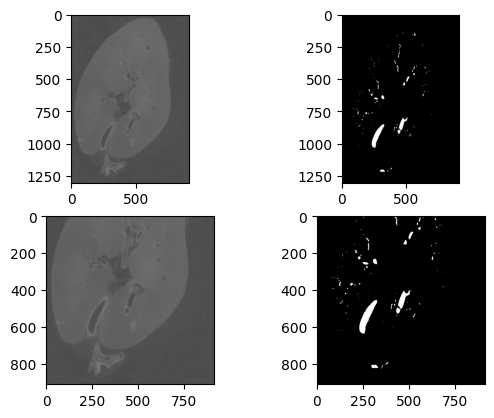

In [9]:

# show files in backup and original rectangular
from glob import glob
import cv2
folder = "kidney_1_dense_yolo"
image_names = glob(f"./{folder}/images_backup/*.tif")
for i in [800]:
    print(image_names[i])
    image_name = image_names[i]
    mask_name = image_name.replace("images","labels")
    print(mask_name)
    plt.subplot(221);plt.imshow(cv2.imread(image_name))
    plt.subplot(222);plt.imshow(cv2.imread(mask_name))
    image_name = image_name.replace("_backup","").replace(".tif","_down.tif")
    mask_name = image_name.replace("images","labels")
    print(image_name,mask_name)
    plt.subplot(223);plt.imshow(cv2.imread(image_name))
    plt.subplot(224);plt.imshow(cv2.imread(mask_name))

In [21]:
# merge kidney_1 and kidney_3
import shutil

kidney_3 = glob("./kidney_3_dense/labels/*.tif")
for i in range(len(kidney_3)):
    label_name = kidney_3[i]
    image_name = label_name.replace("labels","images").replace("dense", "sparse")
    print(label_name, image_name)
    shutil.copyfile(image_name, image_name.replace("_3_sparse","_merged").replace(".tif","_3.tif"))
    shutil.copyfile(label_name, label_name.replace("_3_dense","_merged").replace(".tif","_3.tif"))

./kidney_3_dense/labels\0496.tif ./kidney_3_sparse/images\0496.tif
./kidney_3_dense/labels\0497.tif ./kidney_3_sparse/images\0497.tif
./kidney_3_dense/labels\0498.tif ./kidney_3_sparse/images\0498.tif
./kidney_3_dense/labels\0499.tif ./kidney_3_sparse/images\0499.tif
./kidney_3_dense/labels\0500.tif ./kidney_3_sparse/images\0500.tif
./kidney_3_dense/labels\0501.tif ./kidney_3_sparse/images\0501.tif
./kidney_3_dense/labels\0502.tif ./kidney_3_sparse/images\0502.tif
./kidney_3_dense/labels\0503.tif ./kidney_3_sparse/images\0503.tif
./kidney_3_dense/labels\0504.tif ./kidney_3_sparse/images\0504.tif
./kidney_3_dense/labels\0505.tif ./kidney_3_sparse/images\0505.tif
./kidney_3_dense/labels\0506.tif ./kidney_3_sparse/images\0506.tif
./kidney_3_dense/labels\0507.tif ./kidney_3_sparse/images\0507.tif
./kidney_3_dense/labels\0508.tif ./kidney_3_sparse/images\0508.tif
./kidney_3_dense/labels\0509.tif ./kidney_3_sparse/images\0509.tif
./kidney_3_dense/labels\0510.tif ./kidney_3_sparse/images\0510

In [ ]:

image_names = glob(f"./{folder}/images/*.tif")
for i in range(len(image_names)):
    image_name = image_names[i]
    mask_name = image_name.replace("images","labels")
    label_name = mask_name.replace("tif","txt")
    f = open(label_name,"r")
    lines = f.readlines()
    f.close()
    if len(lines)==0:
        os.remove(image_name)
        os.remove(mask_name)
        os.remove(label_name)
        print(image_name)

In [21]:
# calculate coordinates according to mask
from itertools import chain
from tqdm import tqdm
from glob import glob
folder = "kidney_1_dense"
image_nums = glob(f"./{folder}/labels/*.tif")
image_nums = [x.split(".")[-2].split("\\")[1] for x in image_nums]
# image_nums = [x for x in image_nums if "0700" in x]
# max_x = 0
# max_y = 0
for i in tqdm(range(min(len(image_nums),20000))):
    mask_img = cv2.imread(f"./{folder}/labels/{image_nums[i]}.tif")
    polygons = measure.find_contours(mask_img[:,:,0].T)
    fw = open(f"./{folder}/labels/{image_nums[i]}.txt","w")
    for kk in range(len(polygons)):
        polygon = polygons[kk]
        # max_x = max(max_x, polygon[:,0].max())
        # max_y = max(max_y, polygon[:,1].max())
        polygon[:,0]/=912.0
        polygon[:,1]/=1303.0
        polygon = chain(*np.array(polygon))
        polygon = [np.float32(x) for x in polygon]
        coordinates = " ".join(map(str, polygon))
        fw.write(f"0 {coordinates}\n")
    fw.close()


100%|██████████| 2279/2279 [00:49<00:00, 45.84it/s]


In [20]:
# max_x, max_y

(866.5, 1272.5)

In [ ]:
print(polygons[0])

In [ ]:

# from tqdm import tqdm
# for i in tqdm(range(len(image_nums))):
#     mask_img = cv2.imread(f"./kidney_1_dense/labels/{image_nums[i]}.tif")
#     print(mask_img.shape)

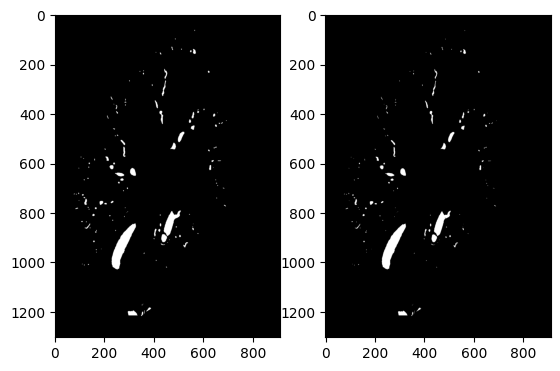

In [22]:

label_txt = "./kidney_1_dense/labels/0800.txt"
fr = open(label_txt)

recovered = np.zeros(mask_img.shape)
for line in fr.readlines():
    polygon = [float(x) for x in line.split()[1:]]
    polygon = np.array(polygon).reshape(1, -1, 2)
    polygon[:,:,0]*=912.0
    polygon[:,:,1]*=1303.0
    cv2.fillPoly(recovered, pts=np.int32(polygon),color=(1,1,1))
plt.subplot(121);plt.imshow(recovered)
plt.subplot(122);plt.imshow(cv2.imread(label_txt.replace(".txt",".tif")))

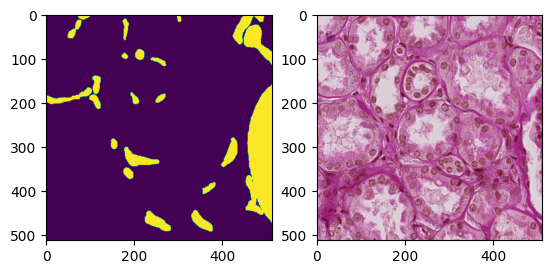

In [15]:
fr = open("../..//hubmap/train/labels/2a9e6a294e2b.txt")
hubmap_img = cv2.imread("../../hubmap/train/images/2a9e6a294e2b.tif")
recovered = np.zeros([512,512])
for line in fr.readlines():
    polygon = [float(x) for x in line.split()[1:]]
    polygon = np.array(polygon).reshape(1, -1, 2)
    # polygon[:,:,0]*=912.0
    # polygon[:,:,1]*=912.0
    cv2.fillPoly(recovered, pts=np.int32(polygon),color=(1,1,1))
plt.subplot(121);plt.imshow(recovered)
plt.subplot(122);plt.imshow(hubmap_img)

In [ ]:
polygon.shape

In [ ]:

folder = "kidney_1_voi"
image_nums = os.listdir(f"./{folder}/images")

image_nums

In [ ]:
img2 = cv2.imread(f"./kidney_1_voi/images/0816.tif")
print(len(os.listdir("./kidney_1_voi/images")))
mask2 = cv2.imread(f"./kidney_1_voi/labels/0816.tif")
plt.subplot(1,2,1);plt.imshow(img2)
plt.subplot(1,2,2);plt.imshow(mask2)
print(img2.shape)
# for path in tqdm(os.listdir("./kidney_1_voi/images")):
#     img2 = cv2.imread(f"./kidney_1_voi/images/{path}")
#     print(img2.shape)

In [ ]:
img3 = cv2.imread(f"./kidney_2/images/0600.tif")
print(len(os.listdir("./kidney_2/images")))
mask3 = cv2.imread(f"./kidney_2/labels/0600.tif")
plt.subplot(1,2,1);plt.imshow(img3)
plt.subplot(1,2,2);plt.imshow(mask3)
print(img3.shape)
# for path in tqdm(os.listdir("./kidney_2/images")):
#     img2 = cv2.imread(f"./kidney_2/images/{path}")
#     print(img2.shape)

In [ ]:
img4 = cv2.imread(f"./kidney_3_sparse/images/0618.tif")
print(len(os.listdir("./kidney_3_sparse/images")))
print(len(os.listdir("./kidney_3_dense/labels")))
mask4 = cv2.imread(f"./kidney_3_sparse/labels/0618.tif")
mask4_2 = cv2.imread(f"./kidney_3_dense/labels/0618.tif")
plt.subplot(1,3,1);plt.imshow(img4)
plt.subplot(1,3,2);plt.imshow(mask4)
plt.subplot(1,3,3);plt.imshow(mask4_2)
print(img4.shape)

In [ ]:
imgt1 = cv2.imread(f"../test/kidney_5/images/0002.tif")
imgt2 = cv2.imread(f"../test/kidney_6/images/0002.tif")
plt.subplot(1,2,1);plt.imshow(imgt1)
plt.subplot(1,2,2);plt.imshow(imgt2)
